In [1]:
# Import standard libraries
import pandas as pd
import talib as ta

#Import custom module
import sys
import os
sys.path.insert(0,os.path.abspath("../scripts"))
import finance_analysis as fa
import importlib
importlib.reload(fa)

<module 'finance_analysis' from 'c:\\Users\\HP\\Desktop\\TenX\\financial-news-dataset\\scripts\\finance_analysis.py'>

In [2]:
# Load the dataset
df = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')

# Display the first few rows of the dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


Apply Technical Indicators with TA-Lib

In [3]:
df = fa.ta_indicators(df)
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI,MACD,MACD_signal,MACD_hist
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Analyzing columns with NaN values

print(df[['Close', 'SMA_20']].head(25))

df.tail()

       Close    SMA_20
0   0.128348       NaN
1   0.121652       NaN
2   0.112723       NaN
3   0.115513       NaN
4   0.118862       NaN
5   0.126116       NaN
6   0.132254       NaN
7   0.137835       NaN
8   0.145089       NaN
9   0.158482       NaN
10  0.160714       NaN
11  0.156808       NaN
12  0.152344       NaN
13  0.154018       NaN
14  0.150670       NaN
15  0.143973       NaN
16  0.137835       NaN
17  0.135045       NaN
18  0.142299       NaN
19  0.141183  0.138588
20  0.136161  0.138979
21  0.136719  0.139732
22  0.139509  0.141071
23  0.138393  0.142215
24  0.146763  0.143611


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI,MACD,MACD_signal,MACD_hist
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,208.474199,48.687742,4.662717,6.678882,-2.016164
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,209.098399,47.386437,3.748082,6.092722,-2.344640
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,209.709000,48.055700,3.026267,5.479431,-2.453164
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500,210.279400,48.476184,2.448591,4.873263,-2.424672
10997,2024-07-30,219.190002,220.330002,216.119995,218.800003,218.547043,41643800,0.0,0.0,225.117001,210.858600,49.359115,2.012764,4.301163,-2.288399


Technical indicators like SMA, RSI, and MACD require a minimum number of data points. For example, a 20-period SMA requires at least 20 data points before it can produce a non-NaN value. The same logic applies to RSI and MACD. The first few rows in these columns may naturally be NaN until enough data is available.

PyNance for Financial Metrics

In [5]:
metrics = fa.financial_metrics(df)

# Print the financial metrics
print("Financial Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

Financial Metrics:
Annualized Return: 0.18589930814725175
Volatility: 0.4428139045746556


Data Visualization

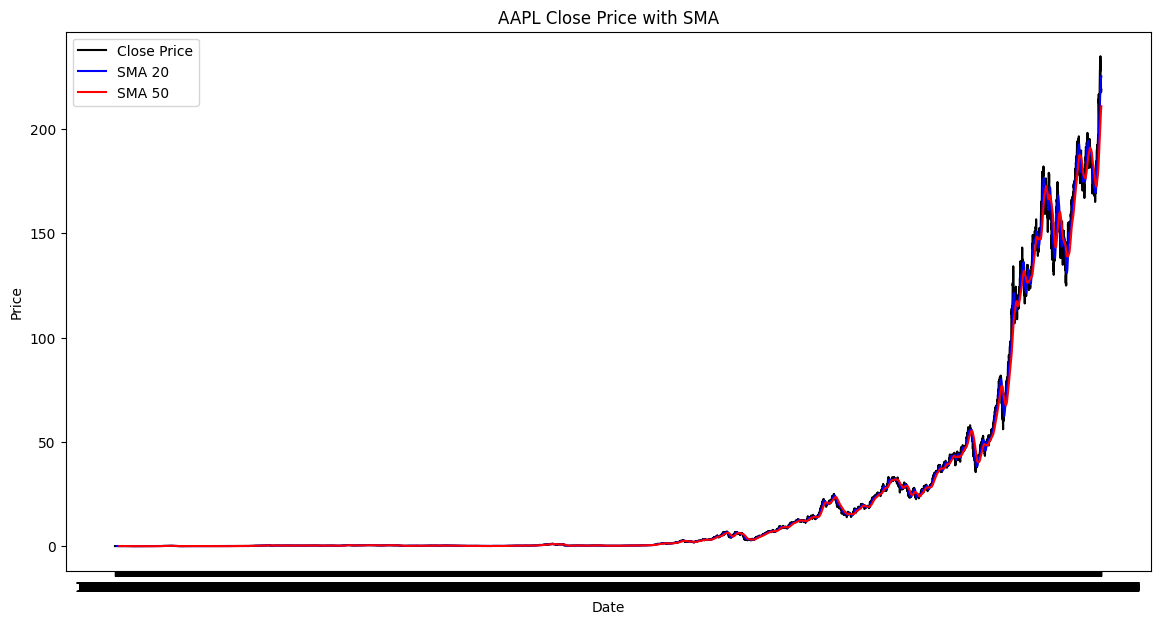

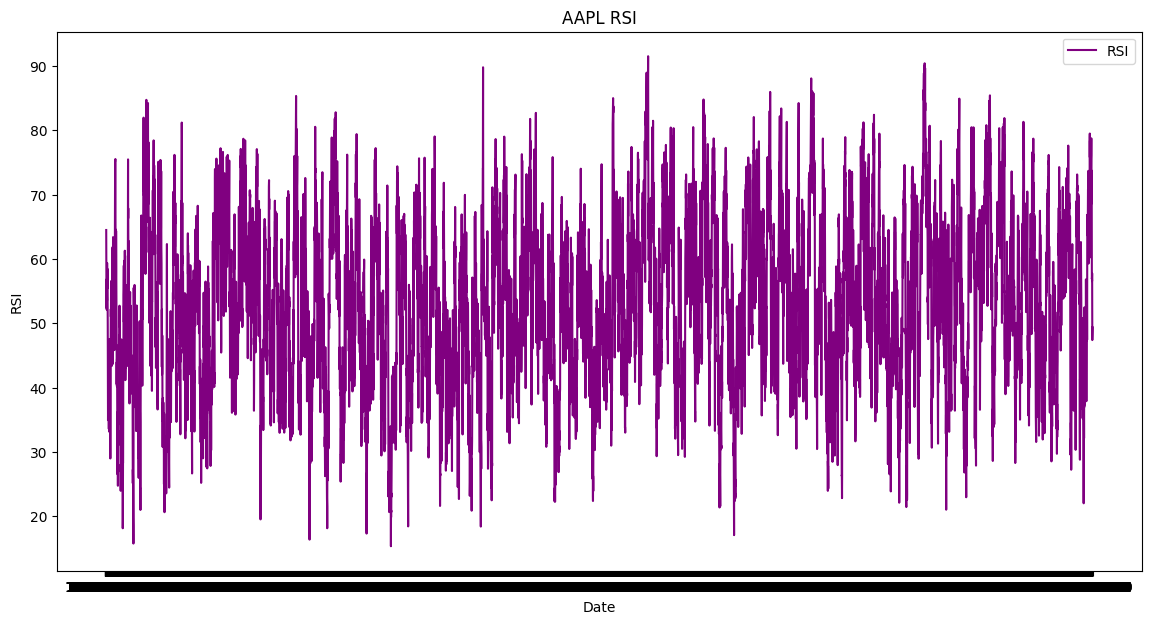

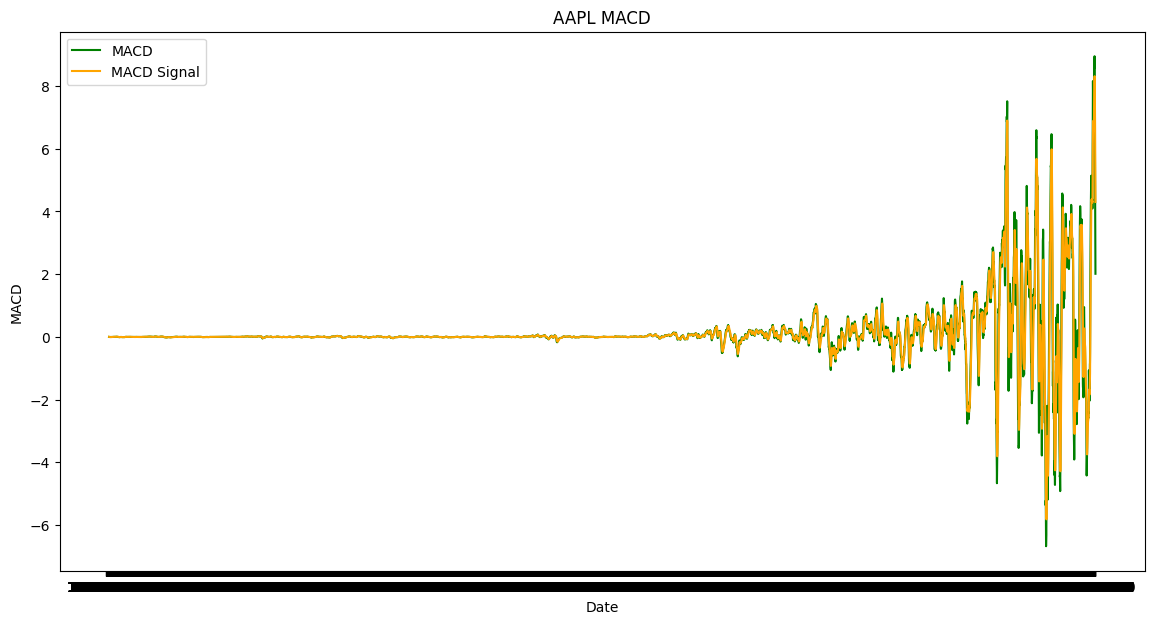

In [6]:
fa.plot_data(df)